In [600]:
#%matplotlib qt
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

In [601]:
def get_edges(img, ksize=5, sigma=3, threshold1=15, threshold2=40):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_blur = cv.GaussianBlur(gray, (ksize,ksize), sigma)
    img_canny = cv.Canny(img_blur, threshold1, threshold2)
    
    return img_canny

In [602]:
def get_scales(template_shape, max_size, cant):
    h_temp, w_temp = template_shape
    h_img, w_img = max_size

    if (w_temp > w_img):
        max_scale = min((w_temp) / w_img , (h_temp) / h_img)
    else:
        max_scale = w_img/w_temp
    scales = []
    scales= np.linspace(0.1, max_scale, num=cant)
        
    return scales

In [612]:
def get_scales_mult(template_shape, max_size, cant):
    h_temp, w_temp = template_shape
    h_img, w_img = max_size

    max_scale = min((w_temp) / w_img , (h_temp) / h_img)

    scales = []
    scales= np.linspace(0.1, max_scale, num=cant)
        
    return scales

In [603]:
def find_unique_template(img, template, meth, sigma=5, threshold1=15, threshold2=40, scales_amount=20):

    #img_salida = img.copy()
    img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_canny =  get_edges(img_rgb, sigma=sigma, threshold1=threshold1, threshold2=threshold2)
    template_canny = get_edges(template)

    #Mejor coincidencia
    best_match_value = -np.inf  
    best_match_template = None 
    best_match_loc = None  

    scales = get_scales(template_canny.shape, img.shape[:2], scales_amount)

    for scale in scales:
        template = cv.resize(template_canny, None, fx=scale, fy=scale)

        img_salida = img_rgb.copy()
        w, h = template.shape[::-1]
        
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        res = cv.matchTemplate(img_canny, template, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

        # Si el valor máximo de coincidencia es mejor que el anterior, actualizamos la mejor coincidencia
        if max_val > best_match_value:
            best_match_value = max_val
            best_match_template = template
            if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
                best_match_loc = min_loc
            else:
                best_match_loc = max_loc

    # Marcamos el lugar donde se encontró la coincidencia
    w, h = best_match_template.shape[::-1]
    bottom_right = (best_match_loc[0] + w, best_match_loc[1] + h)
    cv.rectangle(img_salida, best_match_loc, bottom_right, (0,255,0), 2)
        
    # Mostramos el resultado de la mejor coincidencia
    plt.figure()

    plt.subplot(), plt.imshow(img_salida)
    plt.title('Mejor coincidencia'), plt.xticks([]), plt.yticks([])

    plt.suptitle(meth)
    plt.show()

In [610]:
def find_multiple_template(img, template,threshold = 0.75,meth = 'cv.TM_CCOEFF_NORMED', threshold1=220, threshold2=400, scales_amount=5):

    scales = get_scales_mult(template.shape[:2], img.shape[:2], scales_amount)
    
    for scale in scales:
        resized_template = cv.resize(template,None,fx = scale , fy = scale)
        w, h = resized_template.shape[::-1]
        img_copy = img.copy()
        img_processed = get_edges(img_copy, ksize=5, sigma=2,threshold1=threshold1, threshold2=threshold2)
        
        method = eval(meth)
        match = cv.matchTemplate(img_processed,resized_template, method)
        
        loc = np.where( match >= threshold)

        
        for pt in zip(*loc[::-1]):
            #print(pt)
            cv.rectangle(img_copy, pt, (pt[0] + w, pt[1] + h), (0,255,0), 2)
        if  (len(loc[0]) > 1):
            
            plt.figure()

            #Imagen original con recuadros
            plt.subplot(),plt.imshow(img_copy)
            plt.title('Escala {0:.2f}'.format(scale)), plt.xticks([]), plt.yticks([])
            
            plt.suptitle(meth)
            plt.show()

### 1. Obtener una detección del logo en cada imagen sin falsos positivos

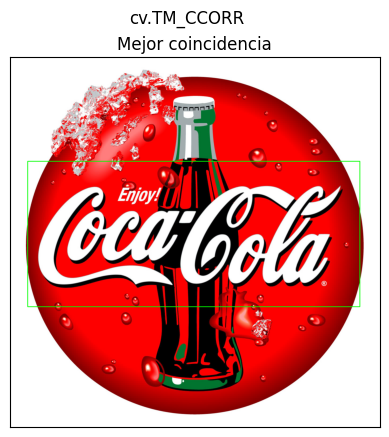

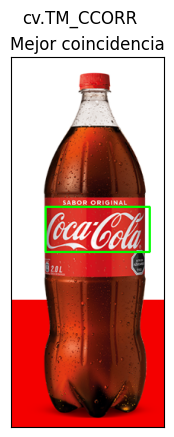

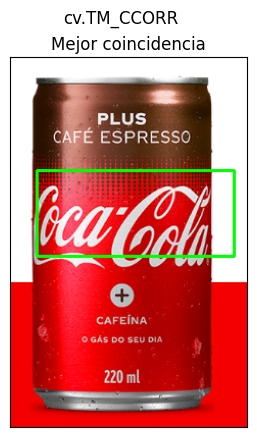

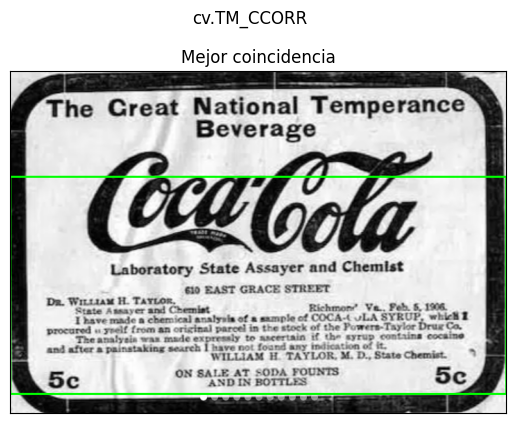

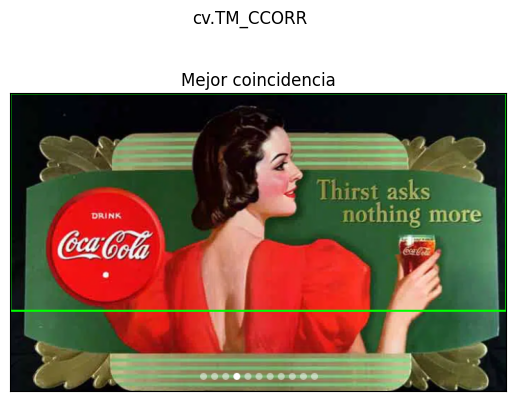

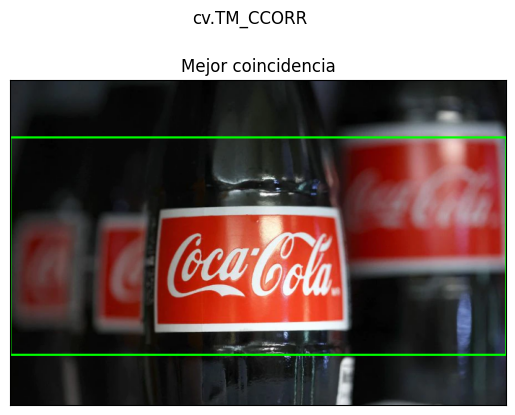

In [605]:
#Leo el template 
template = cv.imread('./template/pattern.png')
#Leo todas las imagenes del directorio
imagenes = ['COCA-COLA-LOGO.jpg', 'coca_logo_1.png', 'coca_logo_2.png', 'coca_retro_1.png', 'coca_retro_2.png', 'logo_1.png']
for imagen in imagenes:
    img = cv.imread(dir + imagen)
    find_unique_template(img, template, meth = 'cv.TM_CCORR')

### 2. Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1

In [606]:
img_multi = cv.imread('./images/coca_multi.png')
rgb_multi = cv.cvtColor(img_multi, cv.COLOR_BGR2RGB)

In [607]:
img_template = cv.imread('./template/pattern.png')
rgb_template = cv.cvtColor(img_template, cv.COLOR_BGR2RGB)
canny_template = get_edges(rgb_template, ksize=3, sigma=1,threshold1=100, threshold2=300)

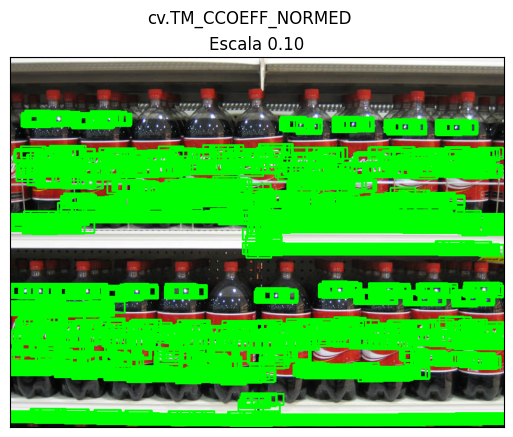

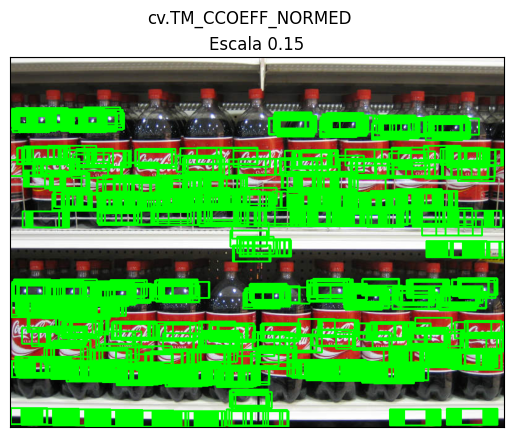

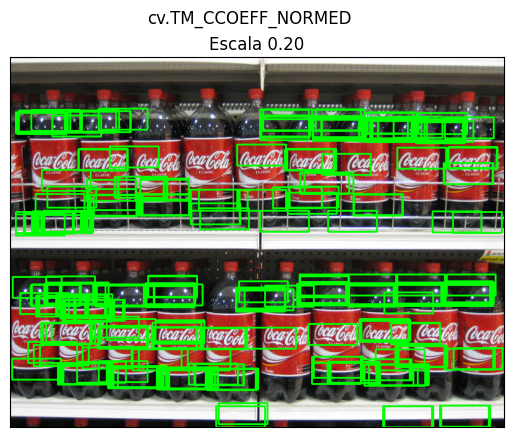

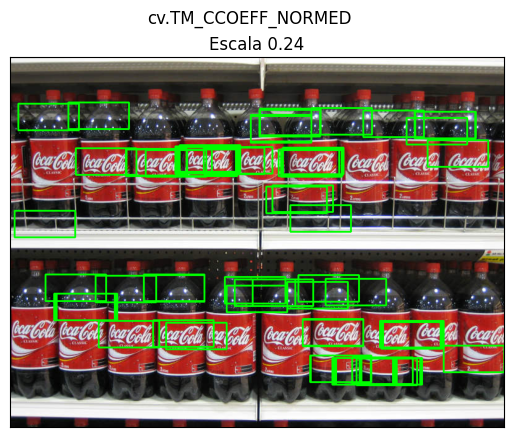

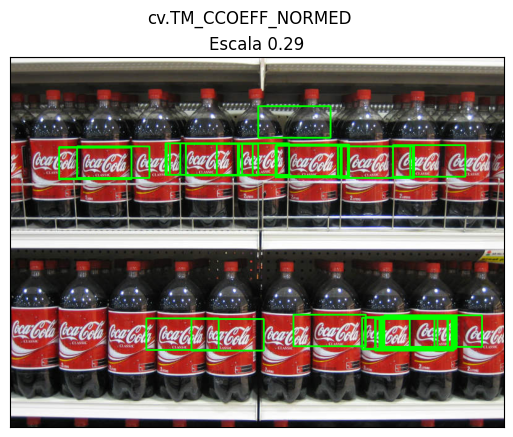

In [613]:
find_multiple_template(rgb_multi,canny_template,0.1,'cv.TM_CCOEFF_NORMED',threshold1=150, threshold2=400)